# Determination of patterns of success of computer games

To plan an advertising campaign for an online store of computer games for the next year, it is necessary to analyze historical data on game sales, user and expert ratings, genres and platforms from open sources and test hypotheses about the success of platforms and game genres.

## Exploring a data file ##

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df=pd.read_csv('games.csv')

In [3]:
display(df.head())
df.info()
df.isna().mean()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

### Comments ###
When reviewing the data file, the following "problems" were noticed that need to be addressed:
- column names - convert to lower case;
- converting data to the required type, for example, columns Year_of_Release and Critic_Score to integer, also, if possible, reduce the bit depth of other columns;
- filling in gaps where possible (gaps are observed in 6 columns).

## Data preparation ## 

In [4]:
df.columns = df.columns.str.lower()
display(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
df['user_score']=df['user_score'].replace('tbd','-1')
df[['year_of_release','critic_score']] = df[['year_of_release','critic_score']].fillna(-1).apply(pd.to_numeric,errors='ignore', downcast='integer')
df[['na_sales','eu_sales','user_score','jp_sales','other_sales']] = df[['na_sales',
                                                                        'eu_sales','user_score','jp_sales','other_sales']].fillna(-1).apply(pd.to_numeric,errors='ignore', downcast='float')

display(df.sort_values('critic_score').head())
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8357,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004,Misc,0.12,0.04,0.00,0.00,-1,-1.0,NaN
10318,Victory Zone,PS,1995,Misc,0.00,0.00,0.10,0.01,-1,-1.0,NaN
10321,Cabela's Adventure Camp,PS3,2011,Misc,0.06,0.03,0.00,0.02,-1,-1.0,E
10322,Goal Storm '97,PS,1996,Sports,0.01,0.00,0.09,0.01,-1,-1.0,NaN
10323,Paws & Claws: Pet Resort,Wii,2009,Simulation,0.10,0.00,0.00,0.01,-1,-1.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int16
genre              16713 non-null object
na_sales           16715 non-null float32
eu_sales           16715 non-null float32
jp_sales           16715 non-null float32
other_sales        16715 non-null float32
critic_score       16715 non-null int8
user_score         16715 non-null float32
rating             9949 non-null object
dtypes: float32(5), int16(1), int8(1), object(4)
memory usage: 897.9+ KB


***year_of_release*** and ***critic_score*** columns have been converted to integer values. ***year_of_release*** - the year of release was indicated with a zero fractional part, and ***critic_score*** - the critics' score was set on a 100-point system, therefore, decimal fractions are not allowed.
Gaps in all columns were filled with the value "-1" for better visibility and further data manipulation. Also, in the ***critic_score*** column, the abbreviation **tbd** was replaced by “-1”, since this most likely means that the score is in the process of exhibiting (determining) at the time of data acquisition, which in our case means a gap data.
                                                                             

In [6]:
df.dropna(subset = ['name'],inplace = True)
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Since the gaps in the columns ***name*** and ***genre*** were less than 1% of the total amount of data in these columns and the information in these rows was missing as much as possible, therefore they were removed from the table and further consideration.

In [7]:
a=df.query('year_of_release <0 ')
a['name']=a['name'].str.lower()
display(a.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,-1,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,fifa soccer 2004,PS2,-1,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,lego batman: the videogame,Wii,-1,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,-1,Fighting,1.57,1.02,0.00,0.41,-1,-1.0,NaN
609,space invaders,2600,-1,Shooter,2.36,0.14,0.00,0.03,-1,-1.0,NaN


In [8]:
def year_game(data,name,name_2):
    for i in data[name].index:
        try:
            data.loc[i,name_2]=pd.to_numeric(data.loc[i,name].split()[len(data.loc[i,name].split())-1],errors='raise',downcast='integer')-1
        except:
            d = 1
    return data

In [9]:
df_temp=year_game(a,'name','year_of_release')
df_temp['year_of_release'] = df_temp['year_of_release'].apply(lambda x: x if type(x) != str else -1)
df_temp['year_of_release'] = df_temp['year_of_release'].where(df_temp['year_of_release'] > 1950, -1)
display(df_temp.query('year_of_release > 0'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,2003,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,fifa soccer 2004,PS2,2003,Sports,0.59,2.36,0.04,0.51,84,6.4,E
475,wwe smackdown vs. raw 2006,PS2,2005,Fighting,1.57,1.02,0.00,0.41,-1,-1.0,NaN
1650,nascar thunder 2003,PS2,2002,Racing,0.60,0.46,0.00,0.16,84,8.7,E
3486,madden nfl 2002,XB,2001,Sports,0.53,0.02,0.00,0.03,90,8.1,E
4775,nfl gameday 2003,PS2,2002,Sports,0.20,0.15,0.00,0.05,60,-1.0,E
5156,nba live 2003,XB,2002,Sports,0.31,0.04,0.00,0.01,82,8.8,E
5655,all-star baseball 2005,PS2,2004,Sports,0.16,0.12,0.00,0.04,72,8.6,E
5889,nba live 2003,GC,2002,Sports,0.23,0.06,0.00,0.01,82,8.2,E
8918,all-star baseball 2005,XB,2004,Sports,0.11,0.03,0.00,0.01,75,8.8,E


In [10]:
df.loc[df['year_of_release'] < 0 , 'year_of_release'] = df_temp['year_of_release']

In [11]:
df['year_of_release']=df['year_of_release'].replace(-1, np.nan)
group_data = df.groupby('platform')
df['year_of_release'] = group_data['year_of_release'].apply(lambda x: x.fillna(x.median()))
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float32
eu_sales           16713 non-null float32
jp_sales           16713 non-null float32
other_sales        16713 non-null float32
critic_score       16713 non-null int8
user_score         16713 non-null float32
rating             9949 non-null object
dtypes: float32(5), int64(1), int8(1), object(4)
memory usage: 1.1+ MB


In [12]:
df['rating'] = df['rating'].fillna('N')
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,-1,-1.0,N
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,-1,-1.0,N


The gaps in the ***year_of_release*** column have been replaced with:

1) the year values taken from the game title if it is present at the end of the title, and 1 year is subtracted, since the next year relative to the release is indicated in the title;

2) medium relative to the platform.

The gaps in ***critic_score*** and ***user_score*** were not filled in, as the rating exhibition is affected by the quality and story of the game. The gaps in the ***rating*** column were filled with "N" - no rating.

In [13]:
df['sum_sales'] = (df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)).round(3)
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76,8.0,E,82.540001
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,-1,-1.0,N,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,-1,-1.0,N,31.379999


### Comments ###
- Gaps in columns ***name*** and ***genre*** were removed as they were less than 1% of the data.
- The gaps in the ***year_of_release*** and ***rating*** columns have been filled in with the average and most popular respectively.
- Gaps in ***critic_score*** and ***user_score*** were not filled. **tbd** in the ***critic_score*** column have been replaced with a blank, as it is assumed that the score was in the process of setting at the time of data collection = absent.

## Data analysis ## 

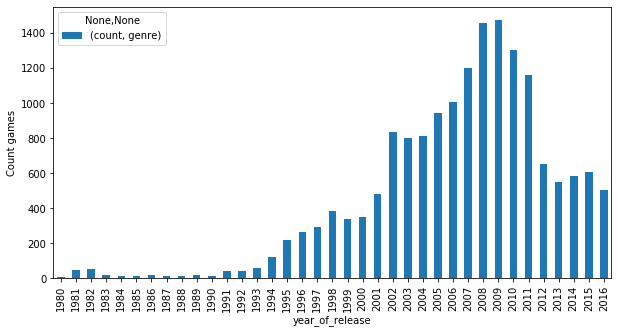

In [14]:
stat_year=df.pivot_table(
    index='year_of_release', values='genre', aggfunc=['count'])
stat_year.plot(kind='bar',figsize=(10,5))
plt.xlabel('year_of_release')
plt.ylabel('Count games')
plt.show()

In [15]:
df['year_of_release'].describe()

count    16713.000000
mean      2006.471908
std          5.897060
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

The figure shows the number of released games by year. As you can see from the figure, the active growth in the release of games began in the 90s, the next sharp jump is observed in the 2000s.
I suppose that data up to about the 2000s can be excluded from consideration, since this period saw a gradual development of this type of entertainment and was not yet so popular.

In [16]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [17]:
stat_sum_sales=df[['platform','sum_sales']].groupby('platform').sum().sort_values(by='sum_sales',ascending=False)
display(stat_sum_sales.head())

,sum_sales
platform,
PS2,1255.770020
X360,971.419983
PS3,939.650024
Wii,907.510010
DS,806.119995


In [18]:
df_temp2=df[['platform','year_of_release','genre']][df[['platform','year_of_release','genre']]['platform'].isin(['PS2','X360','PS3','Wii','DS'])]
def stat(data,column1,column2):
    data1=data.pivot_table(index = column1, values = column2, aggfunc=['count'])
    data1.plot(kind='bar',figsize=(10,5),grid=True)
    plt.xlabel('year_of_release')
    plt.ylabel('Count games')

,platform,year_of_release,genre
0,Wii,2006,Sports
2,Wii,2008,Racing
3,Wii,2009,Sports
6,DS,2006,Platform
7,Wii,2006,Misc


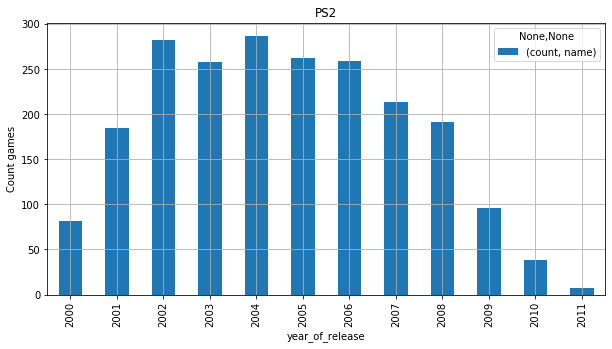

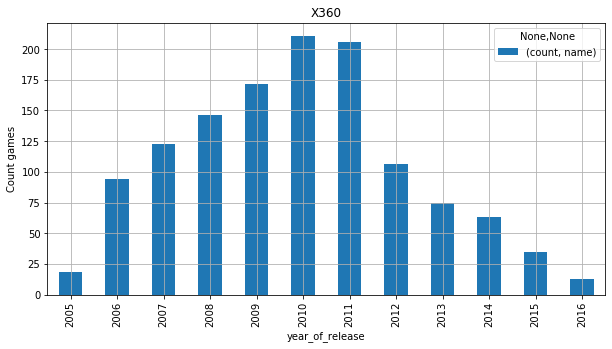

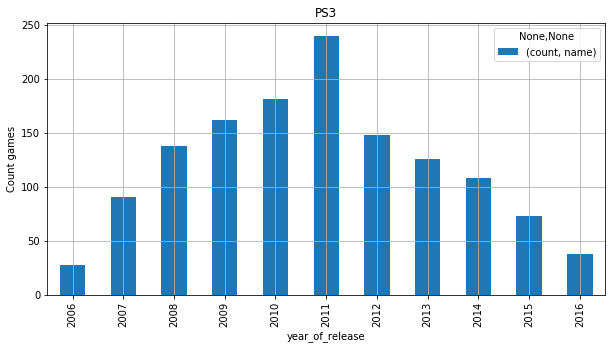

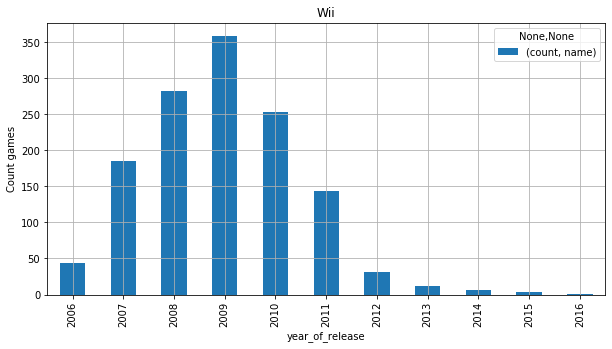

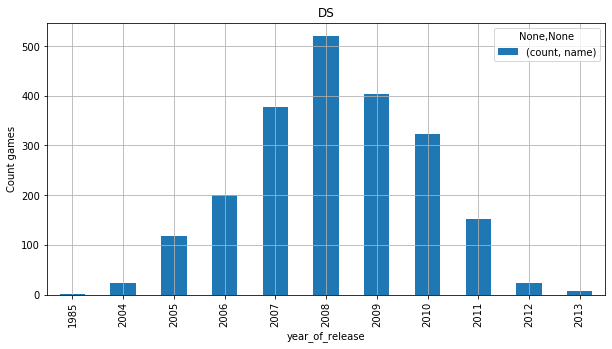

In [19]:
stat(df[df['platform']=="PS2"],'year_of_release','name')
plt.title('PS2')
stat(df[df['platform']=="X360"],'year_of_release','name')
plt.title('X360')
stat(df[df['platform']=="PS3"],'year_of_release','name')
plt.title('PS3')
stat(df[df['platform']=="Wii"],'year_of_release','name')
plt.title('Wii')
stat(df[df['platform']=="DS"],'year_of_release','name')
plt.title('DS')
display(df_temp2.head())

From the presented distributions of game releases by years for the platforms with the largest total sales, it can be seen that the average life of the platform from the moment the games appear until the release decline is on average 10 years. Basically, the presented platforms began active growth in the 2000s.
On the example of platforms from the PS line, it can be seen that PS2 began releasing games from 2000, PS3 from 2006, and a decline is observed after 10 years.

In [20]:
df_2012=df[df['year_of_release']>=2012]
display(df_2012.query('platform =="DS"').head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
83,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,-1,-1.0,N,8.06
2039,Pokemon Conquest,DS,2012,Role-Playing,0.56,0.05,0.37,0.04,80,8.2,E,1.02
2963,LEGO Batman 2: DC Super Heroes,DS,2012,Action,0.39,0.24,0.00,0.06,-1,8.0,E10+,0.69
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,-1,-1.0,N,0.51
4845,Moshi Monsters: Moshlings Theme Park,DS,2012,Misc,0.03,0.33,0.00,0.04,-1,-1.0,E,0.40


The current period was chosen from 2012, since the sales market stabilized during this period.


In [21]:
sum_sales_2012=df_2012[['platform','sum_sales']].groupby('platform').sum().sort_values(by='sum_sales',ascending=False)
display(sum_sales_2012)

,sum_sales
platform,
PS4,314.140015
PS3,288.790009
X360,236.539993
3DS,195.800003
XOne,159.319992
WiiU,82.190002
PC,62.649998
PSV,49.439999
Wii,35.369999


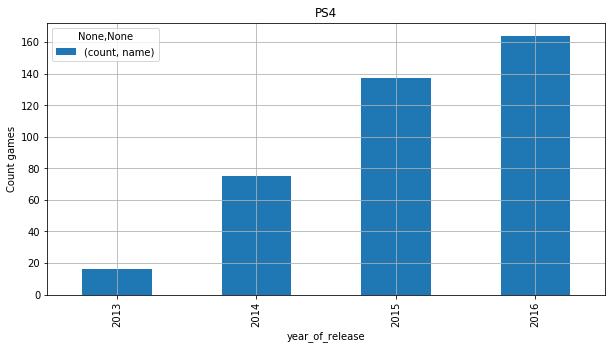

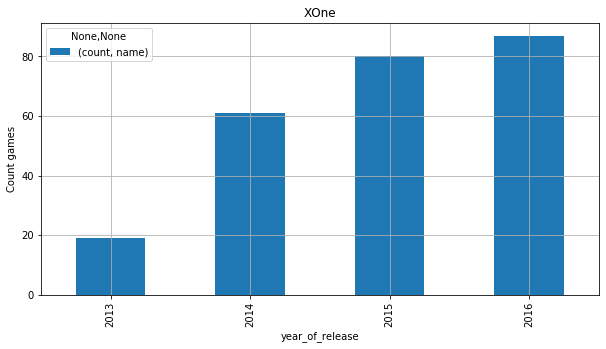

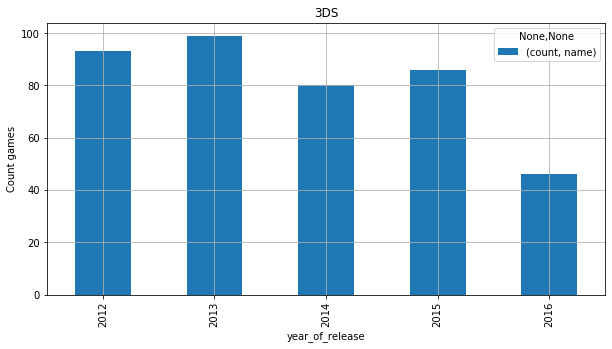

In [22]:
stat(df_2012[df_2012['platform']=="PS4"],'year_of_release','name')
plt.title('PS4')
plt.show()
stat(df_2012[df_2012['platform']=="XOne"],'year_of_release','name')
plt.title('XOne')
plt.show()
stat(df_2012[df_2012['platform']=="3DS"],'year_of_release','name')
plt.title('3DS')
plt.show()

After highlighting the data for the selected current period (since 2012), the sales leaders have changed slightly. From the previous review, we saw that the leaders (PS2, X360 and PS3) had almost stopped releasing games by the time the information was taken, and some had completely stopped releasing games. Therefore, platforms that are catching up (PS4, XOne and 3DS) were considered. The first two show an increase in the release of the game, while the third shows a slight decline.

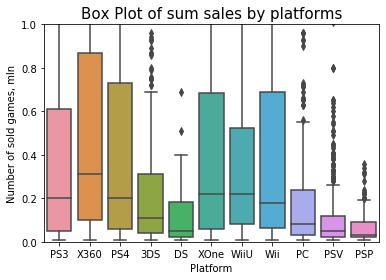

In [23]:
sns.boxplot(x='platform', y='sum_sales', data=df_2012, notch=False)
plt.ylabel('Number of sold games, mln')
plt.xlabel('Platform')
plt.ylim(0, 1)
plt.title('Box Plot of sum sales by platforms', fontsize=15)
plt.show()

The most popular platforms worldwide are PS3, PS4, X360, Wii and XOne. The median value for global sales in these platforms is approximately the same - about 0.25 million copies. But each platform has a certain number of outliers, which indicates the success of individual games.
There is also a slight difference in the popularity of platforms in Japan from other regions.
  

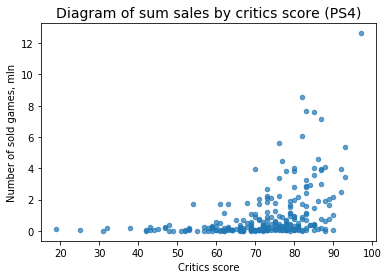

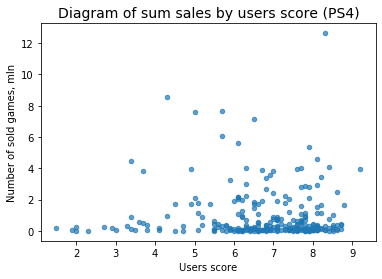

In [24]:
PS4_1=df_2012.query('platform == "PS4" and critic_score >= 0')
PS4_2=df_2012.query('platform == "PS4" and user_score >= 0')
PS4_1.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.7)
plt.ylabel('Number of sold games, mln')
plt.xlabel('Critics score')
plt.title('Diagram of sum sales by critics score (PS4)', fontsize=14)
plt.show()

PS4_2.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.7)
plt.ylabel('Number of sold games, mln')
plt.xlabel('Users score')
plt.title('Diagram of sum sales by users score (PS4)', fontsize=14)
plt.show()


In [25]:
print(PS4_1[['critic_score','sum_sales']].corr()) 
print(PS4_2[['user_score','sum_sales']].corr()) 

              critic_score  sum_sales
critic_score      1.000000   0.406568
sum_sales         0.406568   1.000000
            user_score  sum_sales
user_score    1.000000  -0.031957
sum_sales    -0.031957   1.000000


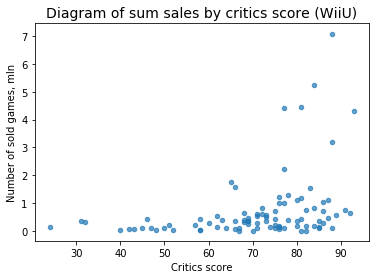

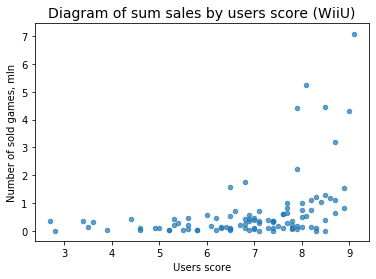

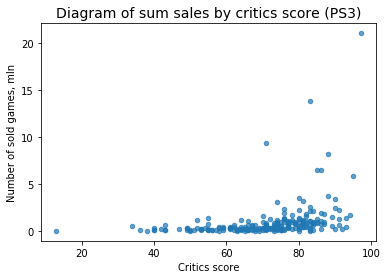

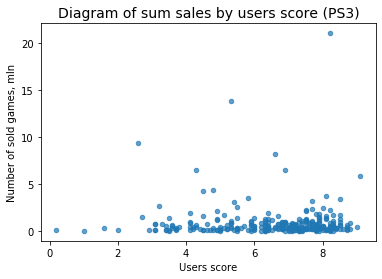

In [26]:
WiiU_1=df_2012.query('platform == "WiiU" and critic_score >= 0')
WiiU_2=df_2012.query('platform == "WiiU" and user_score >= 0')
WiiU_1.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.7)
plt.ylabel('Number of sold games, mln')
plt.xlabel('Critics score')
plt.title('Diagram of sum sales by critics score (WiiU)', fontsize=14)
plt.show()
WiiU_2.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.7)
plt.ylabel('Number of sold games, mln')
plt.xlabel('Users score')
plt.title('Diagram of sum sales by users score (WiiU)', fontsize=14)
plt.show()
PS3_1=df_2012.query('platform == "PS3" and critic_score >= 0')
PS3_2=df_2012.query('platform == "PS3" and user_score >= 0')
PS3_1.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.7)
plt.ylabel('Number of sold games, mln')
plt.xlabel('Critics score')
plt.title('Diagram of sum sales by critics score (PS3)', fontsize=14)
plt.show()
PS3_2.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.7)
plt.ylabel('Number of sold games, mln')
plt.xlabel('Users score')
plt.title('Diagram of sum sales by users score (PS3)', fontsize=14)
plt.show()

Although the Pearson coefficients show a weak dependence of sales of games on the PS4 platform on reviews, the scatterplot shows that with high scores (reviews), sales still increase. This trend is observed after 70 and 7 points from critics and users, respectively.

Comparing the impact of critic and user ratings on sales of games on other platforms (WiiU and PS3) with the results of PS4 showed that these ratings have had an increasing impact on sales in recent times compared to older games.

In [27]:
stat_genre=df_2012.pivot_table(
    index='genre', values='sum_sales', aggfunc=['count','sum','median'])
stat_genre.columns=['count','sum','median']
display(stat_genre.sort_values(by='count',ascending=False))
display(stat_genre.sort_values(by='sum',ascending=False))
display(stat_genre.sort_values(by='median',ascending=False))

,count,sum,median
genre,,,
Action,1032,441.519989,0.120
Role-Playing,372,193.089996,0.140
Adventure,303,29.520000,0.030
Sports,269,181.089996,0.240
Shooter,236,304.799988,0.435
Misc,192,85.040001,0.120
Racing,116,53.590000,0.135
Fighting,109,44.490002,0.130
Platform,85,61.000000,0.210


,count,sum,median
genre,,,
Action,1032,441.519989,0.120
Shooter,236,304.799988,0.435
Role-Playing,372,193.089996,0.140
Sports,269,181.089996,0.240
Misc,192,85.040001,0.120
Platform,85,61.000000,0.210
Racing,116,53.590000,0.135
Fighting,109,44.490002,0.130
Simulation,82,35.610001,0.120


,count,sum,median
genre,,,
Shooter,236,304.799988,0.435
Sports,269,181.089996,0.240
Platform,85,61.000000,0.210
Role-Playing,372,193.089996,0.140
Racing,116,53.590000,0.135
Fighting,109,44.490002,0.130
Action,1032,441.519989,0.120
Misc,192,85.040001,0.120
Simulation,82,35.610001,0.120


  
When considering the distribution of the number of released games by genre and the amount of sales by genre, it can be noted that the first positions are identical in both lists and Action and Role-Playing are in the lead. The next few positions are in different positions relative to each other in the indicated tops, but are still in the top five (Sports and Shooter).
Genres stand out that bring little profit relative to the leaders, although in terms of the number of games released, for example, Adventure is in the top three.

It is worth paying attention to the median values of sales relative to the genres, where the top three is the average of the previous tops - Platform. Sports and Shooter are in the lead.


### Comments ###

From the analysis of the data, there is an active release period of games equal to approximately 10 years. Replaced come updated platforms (improved continuations). For further analysis of the influence, the current period was chosen - since 2010, since during this period there is a great popularity of the latest popular platforms and the old ones that have not yet gone into oblivion.

Were also considered:

Sales figures by platform and region, correlation between game sales and reviews from critics and users, and game popularity and sales relative to game genre.

## User Profile ##

In [28]:
def rait(data,column1,column2,column3):
    data1 = data[[column1,column3]].pivot_table(
        index=column1, values=column3, aggfunc=['sum']).reset_index()
    data1.columns=[column1,column3]
    data1['proportion']=(data1[column3]/sum(data1[column3])).round(3)
    a = data1.sort_values(by=column3,ascending=False).head()
    a.index = np.arange(len(a))
    data2 = data[[column2,column3]].pivot_table(
        index=column2, values=column3, aggfunc=['sum']).reset_index()
    data2.columns=[column2,column3]
    b=data2.sort_values(by=column3,ascending=False).head()
    b.index = np.arange(len(b))
    #result = pd.concat(a,b,axis=1)
    return pd.concat([a,b],axis=1)
    

In [29]:
display(rait(df_2012,'platform','genre','na_sales'))

,platform,na_sales,proportion,genre,na_sales
0,X360,140.050003,0.237,Action,178.020004
1,PS4,108.739998,0.184,Shooter,144.809998
2,PS3,103.379997,0.175,Sports,81.529999
3,XOne,93.120003,0.157,Role-Playing,64.110001
4,3DS,56.150002,0.095,Misc,38.189999


In [30]:
display(rait(df_2012,'platform','genre','eu_sales'))

,platform,eu_sales,proportion,genre,eu_sales
0,PS4,141.089996,0.278,Action,159.529999
1,PS3,106.860001,0.211,Shooter,113.489998
2,X360,74.519997,0.147,Sports,69.089996
3,XOne,51.590000,0.102,Role-Playing,48.580002
4,3DS,42.849998,0.085,Racing,27.290001


In [31]:
display(rait(df_2012,'platform','genre','jp_sales'))

,platform,jp_sales,proportion,genre,jp_sales
0,3DS,87.839996,0.456,Role-Playing,65.540001
1,PS3,35.290001,0.183,Action,52.799999
2,PSV,21.110001,0.110,Misc,12.860000
3,PS4,15.960000,0.083,Simulation,10.410000
4,WiiU,13.010000,0.068,Fighting,9.440000


As mentioned above, there is a difference in popular platforms and genres among the regions of North America, Europe and Japan.
While the Americans and Europeans are similar in their preferences, the Japanese stand out both in the choice of platforms and genres and give the leading preference to the manufacturer from their country.

In [32]:
df_2012[['platform','na_sales','rating']].groupby(['platform','rating']).sum()

na_sales
platform rating           
3DS      E       17.430000
         E10+     8.590000
         M        1.340000
         N       25.030001
         T        3.760000
DS       E        0.800000
         E10+     0.610000
         N        3.180000
PC       E        0.210000
         E10+     0.900000
         M       11.740000
         N        1.230000
         T        5.040000
PS3      E       20.850000
         E10+     7.770000
         M       50.639999
         N       12.150000
         T       11.970000
PS4      E       16.760000
         E10+     9.020000
         M       42.810001
         N       23.770000
         T       16.379999
PSP      E        0.130000
         N        0.000000
         T        0.000000
PSV      E        1.750000
         E10+     0.970000
         M        3.730000
         N        1.940000
         T        2.700000
Wii      E        2.700000
         E10+    13.430000
         N        1.210000
         T        0.110000
WiiU     E       15.389999
         E10+    11.800000
         M        1.990000
         N        6.710000
         T        2.210000
X360     E       24.070000
         E10+    13.870000
         M       74.400002
         N       13.740000
         T       13.970000
XOne     E       14.400000
         E10+     9.000000
         M       44.919998
         N       14.630000
         T       10.170000

In [33]:
display(df_2012[['rating','na_sales']].groupby('rating').sum().sort_values(by='na_sales',ascending=False))
display(df_2012[['rating','eu_sales']].groupby('rating').sum().sort_values(by='eu_sales',ascending=False))
display(df_2012[['rating','jp_sales']].groupby('rating').sum().sort_values(by='jp_sales',ascending=False))

,na_sales
rating,
M,231.569992
E,114.489998
N,103.590004
E10+,75.959999
T,66.309998


,eu_sales
rating,
M,193.960007
E,113.050003
N,91.500000
E10+,55.560001
T,53.009998


,jp_sales
rating,
N,108.889999
E,28.330000
T,26.090000
M,21.200001
E10+,8.190000


Game sales relative to the ESRB rating in North America are quite close in the M (adult) and E (all ages 6+) categories. But they are clearly distinguished by low sales of EU-rated games (for young children). In Japan, games for teenagers stand out in the top 3 in sales.

It is worth noting that there are many games with an indeterminate age rating on the list, but they are still in the top three in terms of sales in all regions, and even occupy a leading position in Japan.

### Comments ###
Popular platforms and genres of games were considered by region: North America, Europe and Japan. We also studied the impact of the ESRB rating on game sales in different regions.

## Hypothesis testing ## 

In [34]:
XboxOne=df_2012.query('platform == "XOne" and user_score > 0')['user_score']
PC=df_2012.query('platform == "PC" and user_score > 0')['user_score']
alpha = 0.05  

results = st.ttest_ind(XboxOne, PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
display(XboxOne.mean().round(3))
display(PC.mean().round(3))

p-значение: 0.5535102808074094
Не получилось отвергнуть нулевую гипотезу


6.521

6.429

In [35]:
Action=df_2012.query('genre == "Action" and user_score > 0')['user_score']
Sports=df_2012.query('genre == "Sports" and user_score > 0')['user_score']
alpha = 0.05  

results = st.ttest_ind(Action, Sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
display(Action.mean().round(3))
display(Sports.mean().round(3))

p-значение: 3.51689957191341e-26
Отвергаем нулевую гипотезу


6.824

5.456

1) The hypothesis was considered that the average user ratings of the Xbox and PC platforms are the same. The null hypothesis was chosen as follows: the average ratings are equal, the alternative hypothesis is different. As a result of the calculation, it was not possible to reject the null hypothesis, the average user ratings are close.

2) The second hypothesis is that the average user ratings of the Action and Sports genres are different. Null hypothesis - average ratings are equal, alternative hypothesis - they are different. As a result of the calculation, the null hypothesis was rejected. Ratings vary.

### Conclusions ###

The submitted game sales data file has been considered and analyzed.

The gaps in the year column were filled in with the average (or taken from the name) value relative to the platform. Gaps in the ratings of critics and users were not filled in, as I considered that this parameter depends on the quality of performance and the plot of the game. The gaps in the ESRB rankings were filled in with a "marker" for later review.

The distribution of the release of games by years was considered (the first games date back to 1980), as a result of which the actual period for further analysis and forecasting for 2017 - 2012 was determined. At this time, game sales have already stabilized after big surges in the games market.

Sales of released games by platform were considered. During this period, 4 platforms (PS3, PS4, X360 and XOne) stand out in almost all regions, and the median value of sales of these games is 0.25 million copies. But also in all considered platforms there are "unique" games that exceed the specified value, i.e. are particularly popular. It should also be noted the difference in interests among users from Japan, which will be noted in the future.

The relationship between critic and user ratings and game sales was also examined. When calculating the correlation, the value of the obtained coefficient showed almost no dependence. But when looking at the scatterplot, one can see an upward trend in sales of games with a critic rating above 70 and a user rating above 7. In addition, the influence of critic and user ratings is increasing compared to the earlier period.

When considering the distribution of the number of released games by genre and the size of sales by genre, it can be noted that the first two positions are identical in both lists and Action and Sports are in the lead. An outsider in sales, but a solid middle peasant in terms of the number of copies, is the Adventure genre.
It is worth noting that in terms of the median value of sales relative to genres, the average of the previous tops - Platform - comes to the fore. Sports and Shooter are in the top three, but Fighting games also made it, although they were in the tail in previous ratings.

When studying the popularity of platforms and genres among regions (North America, Europe and Japan), there was a certain similarity in taste between users from America and Europe: they prefer PS3,4 and X360. Of the genres - Action, Shooter and Sports. Japanese users primarily prefer the platform developed at home - 3DS. And among the genres - Role-Playing.

Also, users from America and Europe prefer games for both adults and for everyone from 6+, while in Japan, games for teenagers are among the top three popular ones. The study took into account games with an indeterminate age rating. It turned out that these games are in the top three in terms of sales in all regions, and in Japan they even occupy a leading position.

The last part of the study tested hypotheses about XOne and PC user ratings. The average ratings for these platforms were close and amounted to 6.5.

The last hypothesis was studied about the user rating among the genres of action and competitive games. User ratings vary. Action games are more user-friendly, with ratings above 6.7, while competitive games do not reach 6.

From all of the above, we can conclude that all genres and platforms have users and their number varies depending on the region (at least Japan stands apart from the rest of the regions represented), although there are some positions that are in the top five:
- among platforms: PS and Xbox line (DS is also present in Japan);
- among the genres: Action, Misc and Role-Playing);
- among the ESRB rating: games for adults and games for everyone from 6+ (games for teenagers are especially popular in Japan).

According to the relatively small size of the world sales, the following genres stand out: Puzzle, Adventure and Strategy.